## Color Mappings

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("../images/dog.jpg")

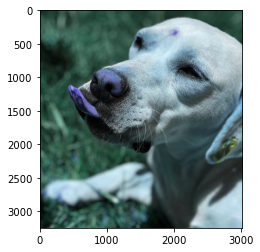

In [3]:
plt.imshow(image)

### RGB

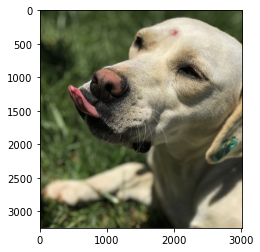

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### HSV

HSV: Hue-Saturation-Value

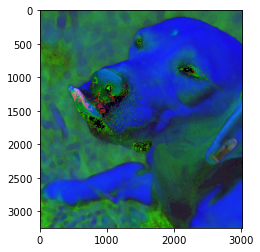

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(image)

### HLS

HLS: Hue-Lightness-Saturation

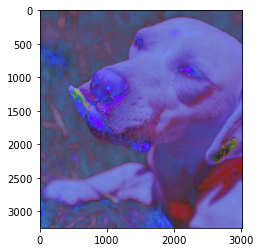

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
plt.imshow(image)

## Blending and Pasting Images

In [7]:
img1 = cv2.imread('../images/dog.jpg')
img2 = cv2.imread('../images/no_copy.png')

In [8]:
img1.shape

(3248, 3024, 3)

In [9]:
img2.shape

(1280, 1277, 3)

In [10]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

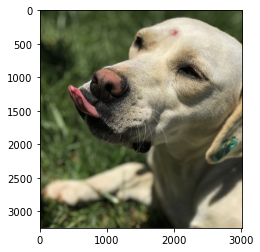

In [11]:
plt.imshow(img1)

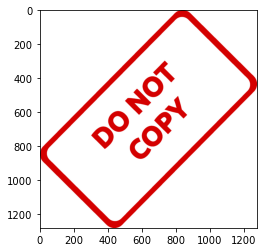

In [12]:
plt.imshow(img2)

In [13]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

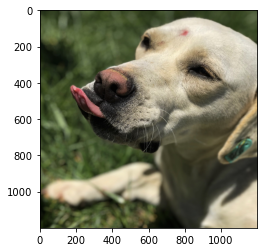

In [14]:
plt.imshow(img1)

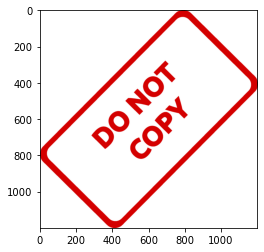

In [15]:
plt.imshow(img2)

Blend the images with addWeighted function(images should be same size), based on the formula: 
$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [16]:
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)

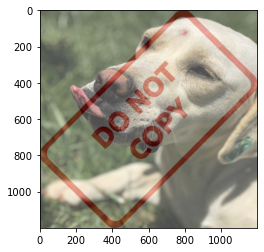

In [17]:
plt.imshow(blended)

### Blending images with different size

In [18]:
img1 = cv2.imread('../images/dog.jpg')
img2 = cv2.imread('../images/no_copy.png')
img2 = cv2.resize(img2,(1000,1000))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Creating a Region of Interest (ROI)

In [19]:
shape = img1.shape
shape

(3248, 3024, 3)

In [20]:
x_offset = shape[1]-1000
y_offset = shape[0]-1000

In [21]:
rows, cols, channels = img2.shape
roi = img1[y_offset: 3248, x_offset: 3024]

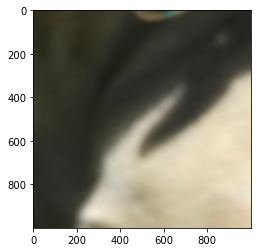

In [22]:
plt.imshow(roi)

Creating a mask

In [23]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
mask_inv = cv2.bitwise_not(img2gray)

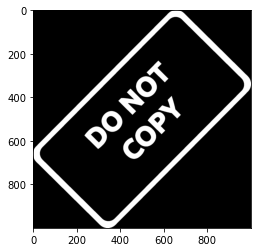

In [24]:
plt.imshow(mask_inv,cmap='gray')

In [25]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

In [26]:
final_roi = cv2.bitwise_or(roi,fg)

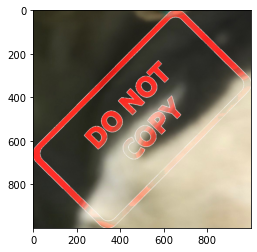

In [27]:
plt.imshow(final_roi)

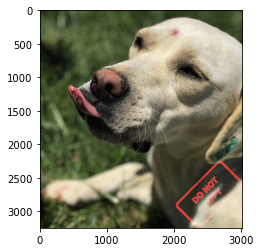

In [28]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)